<a href="https://colab.research.google.com/github/LuanLucasFS/AiModels/blob/main/improved_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries
This section of the code is all about importing necessary libraries for the task, which is likely building and training a deep learning model, possibly for image classification. Here's a breakdown:

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt

1. `import tensorflow as tf`: This imports the TensorFlow library and gives it a shorter alias `tf`. TensorFlow is a powerful library for numerical computation and large-scale machine learning.

1. `from tensorflow.keras.models import Sequential`: This imports the `Sequential` class from Keras, which is TensorFlow's high-level API for building neural networks. `Sequential` allows you to create models layer by layer.

1. `from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D`: This imports various layer types from Keras that are commonly used in building convolutional neural networks (CNNs), which are often used for image tasks.

  * `Dense`: Represents a fully connected layer, where each neuron is connected to every neuron in the previous layer.
  * `Conv2D`: Performs a 2D convolution operation, which is essential for extracting features from images.
  * `Flatten`: Converts a multi-dimensional input (like an image) into a single vector.
  * `Dropout`: Randomly sets input units to 0 during training to prevent overfitting.
  * `MaxPooling2D`: Reduces the spatial dimensions of the input by taking the maximum value within a pooling window.
  * `BatchNormalization`: Normalizes the activations of the previous layer to speed up training.
  * `GlobalAveragePooling2D`: Averages the values across the spatial dimensions of the input.
1. `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: This imports `ImageDataGenerator`, which is a utility for data augmentation. It helps create variations of existing images to increase the training dataset size and improve model generalization.

1. `from tensorflow.keras.applications import MobileNetV2`: Imports the `MobileNetV2` model, a pre-trained model for image classification. This allows you to leverage a powerful model that has already been trained on a large dataset.

1. `from tensorflow.keras.optimizers import Adam`: Imports the `Adam` optimizer, which is an algorithm used to update the weights of the neural network during training.

1. `from tensorflow.keras.callbacks import EarlyStopping`: Imports `EarlyStopping`, a callback that stops training when a monitored metric (like validation loss) stops improving, preventing overfitting.

1. `import os`: Imports the `os` module, which provides functions for interacting with the operating system, like accessing files and directories.

1. `import numpy as np`: Imports the NumPy library and gives it the alias `np`. NumPy is used for numerical operations and working with arrays.

1. `import matplotlib.pyplot as plt`: Imports the Matplotlib library's `pyplot` module and assigns it the alias `plt`. Matplotlib is used for creating visualizations, like plotting graphs.

In essence, this code snippet sets up the environment by importing the necessary tools for building, training, and evaluating a deep learning model, especially one focused on image data.

#Downloading and Preparing the Dataset
This part of the code focuses on downloading the dataset, setting up paths to different parts of it (training, validation, and testing), and defining some important parameters for the model.

##Downloading the Dataset

In [ ]:
# Download dataset
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip

1. `!wget <url>`: This line uses the `wget` command (within the notebook) to download a compressed file (`cats_and_dogs.zip`) containing the "Cats and Dogs" dataset from a given URL.

1. `!unzip <filename>`: This line uses the `unzip` command to extract the contents of the downloaded zip file. This will create a folder named `cats_and_dogs` containing the dataset.

##Setting up Paths

In [ ]:
PATH = 'cats_and_dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

1. `PATH = 'cats_and_dogs'`: This line assigns the name of the dataset folder ('cats_and_dogs') to the variable `PATH`.

1. `train_dir, validation_dir, test_dir`: These lines use `os.path.join` to create paths to the training, validation, and testing subdirectories within the dataset folder. These paths will be used later to access the images for each purpose.

##Calculating Dataset Sizes

In [ ]:
total_train = sum([len(files) for _, _, files in os.walk(train_dir)])
total_val = sum([len(files) for _, _, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

1. `total_train, total_val`: These lines calculate the total number of training and validation images by walking through the respective directories and counting the files.
1. `total_test`: This line calculates the total number of test images by counting the files directly within the `test_dir`.

## Setting Hyperparameters

In [ ]:
batch_size = 64  # Reduced for better GPU efficiency
epochs = 50  # Increased for better learning
IMG_HEIGHT = 224  # Adjusted for MobileNetV2
IMG_WIDTH = 224

1. `batch_size`: This defines the number of images processed in each training iteration. A smaller `batch_size` can improve GPU efficiency.
1. `epochs`: This specifies the number of times the model will be trained on the entire dataset. More epochs can potentially improve learning.
1. `IMG_HEIGHT, IMG_WIDTH`: These parameters define the dimensions to which the images will be resized before being fed into the model. These values are adjusted to be compatible with the `MobileNetV2` model.

In summary, this code snippet downloads the Cats and Dogs dataset, organizes it into training, validation, and testing sets, and defines crucial parameters like batch size, epochs, and image dimensions, preparing the data for use in a deep learning model.

#Data Augmentation and Generators
This code snippet focuses on preparing the image data for training, validation, and testing using a technique called data augmentation. This process involves creating variations of existing images to artificially expand the dataset, which can improve the model's ability to generalize to unseen data and prevent overfitting.

###`ImageDataGenerator`
The core of this process is the `ImageDataGenerator` class. It allows you to define a set of transformations that will be applied randomly to the images during training.

In [36]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.6,
    shear_range=0.3,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 56 images belonging to 1 classes.


* `rescale=1./255`: This rescales the pixel values of the images to be between 0 and 1, which is a common practice in deep learning.
* `rotation_range=60`: Randomly rotates images by up to 60 degrees.
* `width_shift_range=0.2`: Randomly shifts images horizontally by up to 20% of the width.
* `height_shift_range=0.2`: Randomly shifts images vertically by up to 20% of the height.
* `horizontal_flip=True`: Randomly flips images horizontally.
* `vertical_flip=True`: Randomly flips images vertically.
* `zoom_range=0.6`: Randomly zooms in or out on images by up to 60%.
* `shear_range=0.3`: Applies random shearing transformations (distorting the image shape).
* `brightness_range=[0.7, 1.3]`: Randomly adjusts the brightness of the images within the specified range.
* `fill_mode='nearest'`: Determines how the empty space created by transformations is filled (in this case, using the nearest pixel value).

These transformations are only applied to the train_image_generator to increase the diversity of the training data.

The val_image_generator and test_image_generator only rescale the pixel values, ensuring consistency during validation and testing.

In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

###`flow_from_directory`
The `flow_from_directory` method is used to create data generators that load images from directories. It automatically labels the images based on the directory structure.

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
val_data_gen = val_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

* `train_dir`: The path to the directory containing the training images.
* `target_size=(IMG_HEIGHT, IMG_WIDTH)`: Resizes the images to the specified dimensions.
* `batch_size=batch_size`: Determines the number of images to load in each batch.
* `class_mode='binary'`: Indicates that there are two classes (cats and dogs).
Similar generators are created for the validation and test data using `val_image_generator` and `test_image_generator`.

###Test Data Organization
The code also includes a section to organize the test data. It moves all files within the `test_dir` into a subdirectory called "test_images".

In [ ]:
import os

test_images_dir = os.path.join(test_dir, "test_images")
os.makedirs(test_images_dir, exist_ok=True)

for filename in os.listdir(test_dir):
    file_path = os.path.join(test_dir, filename)
    if os.path.isfile(file_path):
        os.rename(file_path, os.path.join(test_images_dir, filename))

This ensures the test data generator can be created with `flow_from_directory`

In [ ]:
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

In essence, this part of the code prepares the data for use in the deep learning model. It uses data augmentation to enhance the training data and organizes all datasets for consistent loading and processing during training, validation, and testing.


#Transfer Learning with MobileNetV2
This code snippet is the heart of the model-building process. It utilizes a technique called Transfer Learning with a pre-trained model called MobileNetV2 to create an image classification model.

In [5]:
# Transfer Learning Model (MobileNetV2)
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1. Loading the Base Model:

  * `base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')`: This line loads the `MobileNetV2` model.
    * `input_shape`: Specifies the dimensions of the input images (`IMG_HEIGHT`, `IMG_WIDTH`, 3 for color images).
    * `include_top=False`: This removes the final classification layer of MobileNetV2, as we'll add our own for this specific task.
    * `weights='imagenet'`: This loads the pre-trained weights obtained by training MobileNetV2 on the ImageNet dataset, a large dataset of various objects.
1. Freezing the Base Model:

  * `base_model.trainable = False`: This line freezes the layers of the `base_model`. This means the weights of these layers will not be updated during training, preserving the knowledge learned from ImageNet. This is a common practice in transfer learning to prevent the pre-trained weights from being drastically altered in the early stages of training on a smaller dataset.
1. Building the Final Model:

  * `model = Sequential(...)`: This creates a `Sequential` model, meaning layers are added sequentially.
  * Inside the `Sequential` model:
    * `base_model`: The pre-trained `MobileNetV2` is added as the first layer.
    * `GlobalAveragePooling2D()`: This layer averages the output of the `base_model` across the spatial dimensions, reducing the dimensionality.
    * `Dense(512, activation='relu')`: This adds a fully connected layer with 512 neurons and the ReLU activation function. This layer learns complex patterns from the features extracted by `MobileNetV2`.
    * `Dropout(0.5)`: This layer randomly sets 50% of the input units to 0 during training, helping to prevent overfitting.
    * `Dense(1, activation='sigmoid')`: This is the final output layer with a single neuron and the sigmoid activation function. It produces a probability between 0 and 1, representing the likelihood of the input image belonging to one of the two classes (cat or dog).

In Summary: This code leverages the power of a pre-trained model (`MobileNetV2`) to extract meaningful features from images. It then adds a few custom layers on top to learn task-specific patterns and make predictions for your image classification task.

By freezing the `base_model` initially, it focuses on training the new layers, making the training process more efficient and less prone to overfitting on a limited dataset.

# Compiling model

In [6]:
# Compile model with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

This code snippet is responsible for compiling the deep learning model, which essentially means preparing it for training. It involves three key components:

1. Optimizer (`Adam` with a lower learning rate):

  * `optimizer=Adam(learning_rate=0.0001)`: This line specifies the optimization algorithm used to update the model's weights during training.
  * `Adam` is a popular optimization algorithm known for its efficiency.
  * `learning_rate=0.0001`: This is a crucial parameter that controls how much the model's weights are adjusted during each training step. A lower learning rate, like 0.0001 in this case, makes the model learn more slowly and carefully, potentially leading to better results and preventing it from overshooting the optimal solution.
1. Loss Function (`binary_crossentropy`):

  * `loss='binary_crossentropy'`: This specifies the function used to measure the difference between the model's predictions and the actual target values (cat or dog in this case).
  * `binary_crossentropy` is a common loss function for binary classification problems where the goal is to predict one of two classes.
1. Metrics (`accuracy`):

  * `metrics=['accuracy']`: This defines the metrics used to evaluate the model's performance during training and validation.
  * `accuracy` is a common metric that measures the percentage of correctly classified images.

In simpler terms:

Imagine you are teaching a dog a new trick. The optimizer is like your training method, the learning rate is how big of a reward or correction you give the dog for each attempt, the loss function is how you measure how well the dog is performing the trick, and the metrics are your overall assessment of the dog's progress (e.g., how often it does the trick correctly).

This line of code sets up these essential components to guide the training process of your deep learning model. By using `Adam` with a lower learning rate, the code aims to train the model effectively and prevent it from getting stuck or overshooting the optimal solution during the learning process. The `binary_crossentropy` loss and `accuracy` metric are appropriate choices for the binary classification task (cat vs. dog).

#Early Stopping


In [7]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

##Early Stopping Explained
This code implements a technique called early stopping which is a crucial part of training machine learning models, especially deep learning models.

Early stopping helps prevent overfitting, which happens when a model learns the training data too well and performs poorly on unseen data. Imagine a student who memorizes the entire textbook but can't answer questions that are phrased differently. That's overfitting.

##How it works
1. `early_stopping = EarlyStopping(...)`: This line creates an `EarlyStopping` object called `early_stopping` and configures it with specific parameters. This object will be used during the model training process.

1. `monitor='val_loss'`: This parameter tells the `EarlyStopping` callback to monitor the validation loss during training. Validation loss is a measure of how well the model is performing on a separate dataset (the validation set) that it hasn't seen during training.

1. `patience=5'`: This parameter sets the patience level. It means that if the validation loss doesn't improve for 5 consecutive epochs (training cycles), the training process will be stopped. An epoch is one full pass through the entire training dataset. This patience value helps us to stop early without being too sensitive to minor fluctuations in validation loss.

1. `restore_best_weights=True'`: This parameter ensures that when the training is stopped early, the model's weights will be reset to the values they had at the epoch where the validation loss was the lowest. We do this because, as training progresses, the model may start overfitting, meaning its performance on the validation set might start to degrade even if its performance on the training set is still improving. Restoring the best weights ensures we use the model with the best generalization performance on unseen data.

##In Simple Terms
Think of it like this: You're baking a cake, and you check on it every 5 minutes (patience). If the cake starts to burn (validation loss increases), you take it out of the oven (stop training) even if the timer hasn't gone off yet (maximum epochs). And you try to use the version that looked best (restore best weights).

By using this `early_stopping` callback, the code aims to train the model efficiently and prevent it from overfitting to the training data, leading to better performance on new, unseen images.

#Training model


In [8]:
# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - accuracy: 0.5823 - loss: 0.7171 - val_accuracy: 0.9635 - val_loss: 0.1848
Epoch 2/50
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1:15 3s/step - accuracy: 0.7344 - loss: 0.5239

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7344 - loss: 0.5239 - val_accuracy: 0.9646 - val_loss: 0.1795
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 192s 6s/step - accuracy: 0.8097 - loss: 0.4219 - val_accuracy: 0.9667 - val_loss: 0.1299
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8906 - loss: 0.3071 - val_accuracy: 0.9646 - val_loss: 0.1287
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.8332 - loss: 0.3610 - val_accuracy: 0.9729 - val_loss: 0.1143
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8281 - loss: 0.3829 - val_accuracy: 0.9729 - val_loss: 0.1119
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 264s 7s/step - accuracy: 0.8377 - loss: 0.3270 - val_accuracy: 0.9698 - val_loss: 0.1035
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.8281 - loss: 0.3507 - val_accuracy: 0.9729 - val_loss: 0.1000
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.8612 - loss: 0.3270 - val_accuracy: 0.9708 - val_loss: 0.0965

This is where the actual training of the deep learning model happens. Let's go through each part:

1. `history = model.fit(...)`: This line starts the training process. The `model.fit` function is a core part of Keras (and TensorFlow) and is used to train the model on the provided data. The `history` variable will store the training progress information (like accuracy and loss over time).

1. `train_data_gen`: This is the training data generator that we created earlier using `ImageDataGenerator`. It provides batches of training images and their corresponding labels to the model during training.

1. `steps_per_epoch=total_train // batch_size`: This parameter defines how many batches of training data are processed in each epoch.

  * `total_train`: The total number of training images.
  * `batch_size`: The number of images in each batch.
  * `//`: The floor division operator, ensuring the result is a whole number.
1. `epochs=epochs`: This specifies the number of times the model will be trained on the entire training dataset. The value of `epochs` was defined earlier in the code.

1. `validation_data=val_data_gen`: This provides the validation data generator. The model's performance is evaluated on the validation data after each epoch to monitor its progress and prevent overfitting.

1. `validation_steps=total_val // batch_size`: This parameter defines how many batches of validation data are used in each epoch. Similar to `steps_per_epoch`, it is calculated using the total number of validation images (`total_val`) and the `batch_size`.

1. `callbacks=[early_stopping]`: This line includes the `early_stopping` callback that we defined previously. This callback helps prevent overfitting by stopping the training process early if the model's performance on the validation data stops improving.

In essence, this code snippet orchestrates the entire training process:

  1. It feeds the model training data in batches (`train_data_gen`).
  1. It specifies how many batches constitute an epoch (`steps_per_epoch`).
  1. It defines the total number of training cycles (`epochs`).
  1. It uses a separate dataset (`validation_data`) to track the model's progress and prevent overfitting.
  1. It includes a mechanism (`callbacks`) to stop the training early if needed.

The information collected during training (accuracy, loss, etc.) is stored in the `history` variable, which can be used later to analyze the training process and visualize the model's performance.

#Fine-tuning Explained



In [9]:
# Fine-tuning: Unfreeze last few layers
base_model.trainable = True
for layer in base_model.layers[:-10]:  # Keep most layers frozen
    layer.trainable = False

This code snippet is about fine-tuning the pre-trained `MobileNetV2` model (`base_model`). Fine-tuning is a crucial step in transfer learning where you adjust the weights of some layers in the pre-trained model to make it more suitable for your specific task.

##How it Works
1. `base_model.trainable = True`: This line unfreezes the entire base_model. Remember that we initially froze it to preserve the knowledge learned from ImageNet. Now, we're allowing its weights to be updated during training.

1. `for layer in base_model.layers[:-10]:`: This line iterates through the layers of the `base_model`, except for the last 10 layers. The `[:-10]` notation means "all layers except the last 10".

1. `layer.trainable = False`: Inside the loop, this line freezes each layer it iterates over.

In simpler terms:

We first unlock all the layers of `base_model`.
Then, we immediately re-lock all but the last 10 layers.
The result is that only the last 10 layers of `base_model` remain trainable (unfrozen).

##Why Fine-tune?
Fine-tuning allows us to adapt the pre-trained model to our specific dataset (cats and dogs). By unfreezing a few of the later layers, we allow the model to learn more specific features relevant to our task while still benefiting from the general knowledge captured in the earlier, frozen layers. This usually leads to better performance and faster training compared to training a model from scratch.

Analogy:

Imagine you have a chef trained in French cuisine (pre-trained model). You want them to learn how to make Italian pasta (your specific task). Instead of teaching them everything from scratch, you fine-tune their existing skills. You let them adjust some techniques (unfreezing some layers) while keeping their fundamental knowledge of cooking (frozen layers) intact. This way, they can quickly learn to make delicious pasta!

This fine-tuning strategy is a common practice in transfer learning. It helps you leverage the power of pre-trained models while still customizing them for your specific task, improving overall accuracy and efficiency. I hope this explanation is helpful!

#Recompile model with smaller learning rate


In [10]:
# Recompile model with smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

This code snippet is responsible for recompiling the deep learning model, specifically after the fine-tuning step. Recompiling is necessary because we've made changes to the model's structure (by unfreezing some layers) and we need to update the training process accordingly.

Here's a detailed explanation:

1. `model.compile(...)`: This line initiates the recompilation process. The `compile` function in Keras (and TensorFlow) is used to configure the model for training.

1. `optimizer=Adam(learning_rate=0.00001)`: This part specifies the optimization algorithm used to update the model's weights during training.

  * `Adam` is a popular and efficient optimization algorithm.
  * `learning_rate=0.00001`: This is the crucial change. The learning rate is reduced significantly compared to the initial compilation. This smaller learning rate is important during fine-tuning because we are making fine adjustments to the pre-trained weights, and large updates could disrupt the existing knowledge.
1. `loss='binary_crossentropy'`: This specifies the function used to measure the difference between the model's predictions and the actual target values (cat or dog in this case). `binary_crossentropy` is a standard loss function for binary classification problems.

1. `metrics=['accuracy']`: This defines how the model's performance will be evaluated during training and validation. `accuracy` is a common metric that measures the percentage of correctly classified images.

Why Recompile with a Smaller Learning Rate?

After fine-tuning, the model has already learned a good representation of features from the pre-trained weights. We want to make careful adjustments to these weights to specialize the model for our cat vs. dog classification task. A smaller learning rate helps ensure these adjustments are gradual and don't drastically change the pre-trained knowledge, leading to better and more stable fine-tuning results.

In simpler terms:

Think of it like this: you've built a house (pre-trained model), and now you want to remodel a specific room (fine-tuning). You wouldn't use a sledgehammer (large learning rate) for remodeling, as it would damage the existing structure. Instead, you'd use finer tools (smaller learning rate) to make precise changes and achieve the desired outcome without causing unnecessary damage.

#Train again with Fine-tuning

In [11]:
# Train again with fine-tuning
history_finetune = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs // 2,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 186s 6s/step - accuracy: 0.7863 - loss: 0.4561 - val_accuracy: 0.9729 - val_loss: 0.0929
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8750 - loss: 0.2983 - val_accuracy: 0.9729 - val_loss: 0.0950
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.8585 - loss: 0.3258 - val_accuracy: 0.9646 - val_loss: 0.1036
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7969 - loss: 0.3626 - val_accuracy: 0.9656 - val_loss: 0.1020
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 192s 6s/step - accuracy: 0.8277 - loss: 0.3601 - val_accuracy: 0.9708 - val_loss: 0.0911
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8594 - loss: 0.3090 - val_accuracy: 0.9698 - val_loss: 0.0964
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.8567 - loss: 0.3144 - val_accuracy: 0.9708 - val_loss: 0.0909
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8438 - loss: 0.3771 - val_accuracy: 0.9740 - val_l

This code is responsible for the second phase of training, specifically the fine-tuning phase, after we've unfrozen some layers of the pre-trained `MobileNetV2` model.

Here's a line-by-line explanation:

1. `history_finetune = model.fit(...)`: This line initiates the training process for fine-tuning.

  * `model.fit` is the core function in Keras used to train models.
  * `history_finetune` is a variable that will store the training progress (accuracy, loss, etc.) during this fine-tuning phase. This allows us to analyze how the fine-tuning process is affecting the model's performance.
1. `train_data_gen`: This is the training data generator we created earlier using `ImageDataGenerator`. It feeds the model batches of training images and their labels.

1. `steps_per_epoch=total_train // batch_size`: This calculates how many batches of training data will be processed in each epoch.

  * `total_train`: The total number of training images.
  * `batch_size`: The number of images in each batch.
  * `//`: Floor division, ensuring the result is an integer.
1. `epochs=epochs // 2`: This specifies the number of training epochs for this fine-tuning phase.

  * It's important to note that we are using half the original `epochs` value (`epochs // 2`). This is because we are fine-tuning, and extensive training might lead to overfitting on the smaller dataset.
1. `validation_data=val_data_gen`: This provides the validation data generator. The model's performance is evaluated on this data after each epoch to monitor progress and prevent overfitting.

1. `validation_steps=total_val // batch_size`: Similar to `steps_per_epoch`, it calculates how many batches of validation data will be used in each epoch.

1. `callbacks=[early_stopping]`: This includes the `early_stopping` callback, which was defined earlier. This helps prevent overfitting by stopping training early if the validation loss stops improving for a certain number of epochs (defined by the `patience` parameter when `early_stopping` was created).

In Summary

This code snippet is fine-tuning the model by training it for a reduced number of epochs on the training and validation datasets, using a smaller learning rate (which was set during the recompilation step), and with early stopping to prevent overfitting. The goal is to make small adjustments to the pre-trained weights to improve performance specifically for the task of classifying cats and dogs.

#Plotting Accuracy and Loss


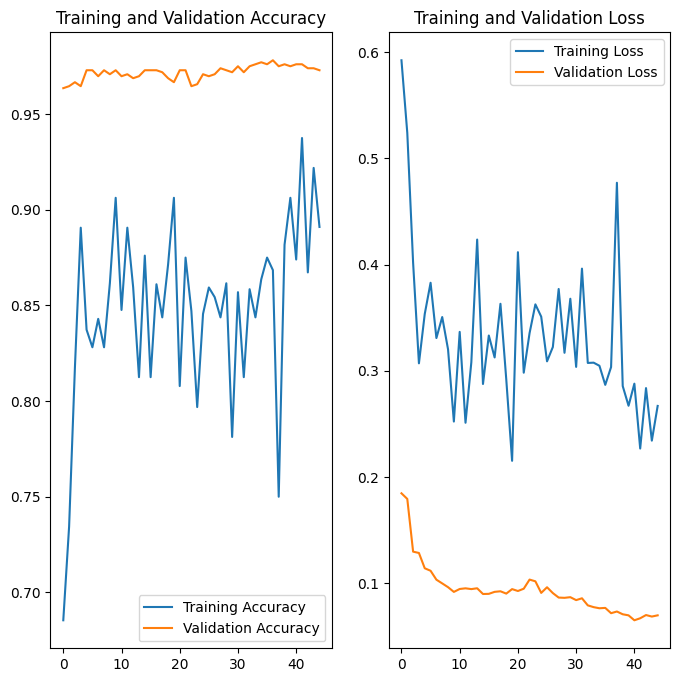

In [12]:
# Plot Accuracy and Loss
acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']
loss = history.history['loss'] + history_finetune.history['loss']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Combining Training History
  1. `acc = history.history['accuracy'] + history_finetune.history['accuracy']`: This line combines the training accuracy from the initial training phase (`history.history['accuracy']`) and the fine-tuning phase (`history_finetune.history['accuracy']`) into a single list called `acc`.

  2. `val_acc`, `loss`, `val_loss`: Similar to the accuracy, these lines combine the validation accuracy, training loss, and validation loss from both training phases into their respective lists.

## Setting up the Plot
  3. `epochs_range = range(len(acc))`: This line creates a range of numbers representing the epochs (training cycles) for the x-axis of the plots.

  4. `plt.figure(figsize=(8, 8))`: This line creates a figure for the plots with a specified size (8 inches by 8 inches).

## Plotting Accuracy
  5. `plt.subplot(1, 2, 1)`: This line creates the first subplot (out of 1 row and 2 columns) which will display the accuracy plot.

  6. `plt.plot(epochs_range, acc, label='Training Accuracy')`: This line plots the training accuracy (`acc`) over the epochs (`epochs_range`). It also sets a label for the line in the legend.

  7. `plt.plot(epochs_range, val_acc, label='Validation Accuracy')`: This line plots the validation accuracy (`val_acc`) in the same subplot, with a corresponding label.

  8. `plt.legend(loc='lower right')`: This line displays the legend (showing the labels for the lines) in the lower right corner of the subplot.

  9. `plt.title('Training and Validation Accuracy')`: This line sets the title for the accuracy subplot.

##Plotting Loss
  10. `plt.subplot(1, 2, 2)`: This line creates the second subplot for the loss plot.

  11. `plt.plot(epochs_range, loss, label='Training Loss')`: This line plots the training loss (`loss`) over the epochs, with a label.

  12. `plt.plot(epochs_range, val_loss, label='Validation Loss')`: This line plots the validation loss (`val_loss`) in the same subplot.

  13. `plt.legend(loc='upper right')`: This line displays the legend for the loss subplot in the upper right corner.

  14. `plt.title('Training and Validation Loss')`: This line sets the title for the loss subplot.

##Displaying the Plots
  15. `plt.show()`: Finally, this line displays the created plots (accuracy and loss) on the screen.

In Summary: This code visualizes the training process by plotting the accuracy and loss of the model over epochs. This visualization helps us understand how well the model is learning and if it's overfitting. By combining the data from both training phases (initial training and fine-tuning), we can get a comprehensive view of the model's performance throughout the entire training process.

#Evaluating the Model

In [ ]:
# Evaluate on test data
probabilities = model.predict(test_data_gen)
probabilities = probabilities.flatten().tolist()

1. `probabilities = model.predict(test_data_gen)`: This line uses the trained `model` to predict the probabilities for the images in the `test_data_gen` (the test dataset generator). The output is an array of probabilities, where each probability indicates the model's confidence in its prediction (e.g., a probability of 0.8 might suggest the model is 80% sure the image is a dog).

2. `probabilities = probabilities.flatten().tolist()`: This line converts the probabilities array into a simple list. `flatten()` makes it one-dimensional, and `tolist()` converts it into a Python list. This makes it easier to work with the probabilities later.

#Visualizing Predictions

In [ ]:
# Display 20 test images with predictions
def plot_test_images(generator, probabilities, true_labels, num_images=56):
    test_images = next(generator)  # Only unpack image data
    fig, axes = plt.subplots(int(np.ceil(num_images/2)), 2, figsize=(50, 40))
    axes = axes.flatten()

    for i in range(num_images):
        img = test_images[i]
        pred_label = 'Dog' if probabilities[i] > 0.5 else 'Cat'
        true_label = 'Dog' if true_labels[i] == 1 else 'Cat'

        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")

    plt.tight_layout()
    plt.show()

true_labels = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
plot_test_images(test_data_gen, probabilities, true_labels, num_images=56)

1. `def plot_test_images(...)`: This defines a function to plot a grid of test images along with their true labels and the model's predictions.

2. `test_images = next(generator)`: This gets the next batch of images from the `generator` (in this case, `test_data_gen`).

3. `fig, axes = plt.subplots(...)`: This creates a figure and a grid of subplots to display the images.

4. The `for` loop: This loop iterates through the images, gets the model's prediction (`pred_label`), and displays the image with the true and predicted labels.

5. `plt.tight_layout()` and `plt.show()`: These lines adjust the layout of the subplots and display the figure.

6. `true_labels = [...]`: This line defines a list of true labels for the test images.

7. `plot_test_images(...)`: This calls the function to actually display the images with predictions.

#Calculating and Printing Accuracy

In [ ]:
# Print accuracy result
correct = sum(round(p) == a for p, a in zip(probabilities, true_labels))
percentage_identified = (correct / len(true_labels)) * 100

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images.")
if percentage_identified >= 63:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Keep trying!")

1. `correct = sum(...)`: This line calculates the number of correctly classified images by comparing the rounded probabilities (`round(p)`) with the true labels (`a`).

2. `percentage_identified = ...`: This line calculates the accuracy percentage.

3. `print(...)`: These lines print the accuracy result and a message indicating whether the model passed a predefined accuracy threshold.

# Importing Necessary Libraries

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

* `from google.colab import files`: This line imports the `files` module, which is specific to Google Colab environments. It's used for interacting with the file system within Colab, allowing users to upload files.
* `import matplotlib.pyplot as plt`: Imports the `pyplot` module from Matplotlib for creating visualizations, like plotting the image and the prediction.
* `import matplotlib.image as mpimg`: Imports the `mpimg` module from Matplotlib for reading and displaying images.

#Uploading and Loading the Image

In [ ]:
# Carregar imagem personalizada para teste
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load the image using matplotlib
img = mpimg.imread(image_path)

* `uploaded = files.upload()`: This line triggers a file upload dialog in the Colab environment, allowing the user to select an image from their local machine. The uploaded file information is stored in the uploaded variable.
* `image_path = list(uploaded.keys())[0]`: This line extracts the file path of the uploaded image from the uploaded dictionary.
* `img = mpimg.imread(image_path)`: This line reads the image file using mpimg.imread and loads it into the img variable as a NumPy array representing the image data.

#Preprocessing the Image

In [ ]:
# Preprocess the image to match the model's input format
img = mpimg.imread(image_path)
img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH]) # Resize image using tensorflow
img = img / 255.0  # Rescale pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension

* `img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])`: This line resizes the image to the dimensions expected by the model (`IMG_HEIGHT`, `IMG_WIDTH`), using TensorFlow's `tf.image.resize` function.
* `img = img / 255.0`: This line rescales the pixel values of the image to be between 0 and 1. This is a common preprocessing step for deep learning models.
* `img = np.expand_dims(img, axis=0)`: This line adds an extra dimension to the image data. This is required because the model expects input in batches, even if we're only predicting on a single image.

#Making the Prediction

In [ ]:
# Make prediction
probabilities = model.predict(img)
probabilities = probabilities.flatten().tolist()  # Flatten and convert to list

* `probabilities = model.predict(img)`: This line uses the trained `model` to make a prediction on the preprocessed image (`img`). The output is stored in `probabilities`, which represents the model's confidence in its prediction (a value between 0 and 1).
* `probabilities = probabilities.flatten().tolist()`: This line converts the `probabilities` array into a simple Python list. `flatten()` makes it one-dimensional, and `tolist()` converts it into a list format.

#Displaying the Image and Prediction

In [ ]:
# Display the image with prediction
def plot_test_images(img, probabilities, num_images=1):
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))  # Reduced figsize

    for i in range(num_images):
        pred_label = 'Dog' if probabilities[i] > 0.5 else 'Cat'

        axes.imshow(img[i]) # remove batch dimension for display
        axes.axis('off')
        axes.set_title(f"Pred: {pred_label}")

    plt.tight_layout()
    plt.show()

plot_test_images(img, probabilities, num_images=1)

* `def plot_test_images(...)`: This defines a function to display the image and the model's prediction.
* `fig, axes = plt.subplots(...)`: This creates a Matplotlib figure and axes for the plot.
* `pred_label = 'Dog' if probabilities[i] > 0.5 else 'Cat'`: This line determines the predicted label (dog or cat) based on the probability. If the probability is greater than 0.5, it's classified as a dog; otherwise, it's a cat.
* `axes.imshow(img[i])`: This line displays the image on the axes.
* `axes.axis('off')`: This line turns off the axes ticks and labels.
* `axes.set_title(...)`: This line sets the title of the plot to show the prediction.
* `plt.tight_layout()` and `plt.show()`: These lines adjust the layout and display the plot.
* `plot_test_images(img, probabilities, num_images=1)`: This line calls the function to display the uploaded image and the model's prediction.

In essence, this code allows you to upload an image, preprocesses it, gets the model's prediction, and visually displays the image with the predicted label (cat or dog).